# Лабораторная работа 5
## Сети с обратными связями

### Вороновк К.М., М8О-407Б-19

Цель работы: исследование свойств сетей Хопфилда, Хэмминга и Элмана, алгоритмов обучения, а также применение сетей в задачах распознавания статических и динамических
образов.

Вариант 19

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class Elman(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Elman, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.w1 = nn.Parameter(torch.randn(in_dim, out_dim))
        self.w2 = nn.Parameter(torch.randn(out_dim, out_dim))
        self.b = nn.Parameter(torch.randn(out_dim))
        self.prev = torch.zeros(out_dim)
        
    def clear_memory(self):
        self.prev = torch.zeros(self.out_dim)
        
    def forward(self, input):
        out = input @ self.w1 + self.b + self.prev @ self.w2
        out = torch.tanh(out)
        self.prev = out.clone().detach()
        return out

In [ ]:
def g2(k):
    return np.sin(-np.sin(k) * k * k + k)

In [ ]:
def g1(k):
    return np.sin(4 * np.pi * k)

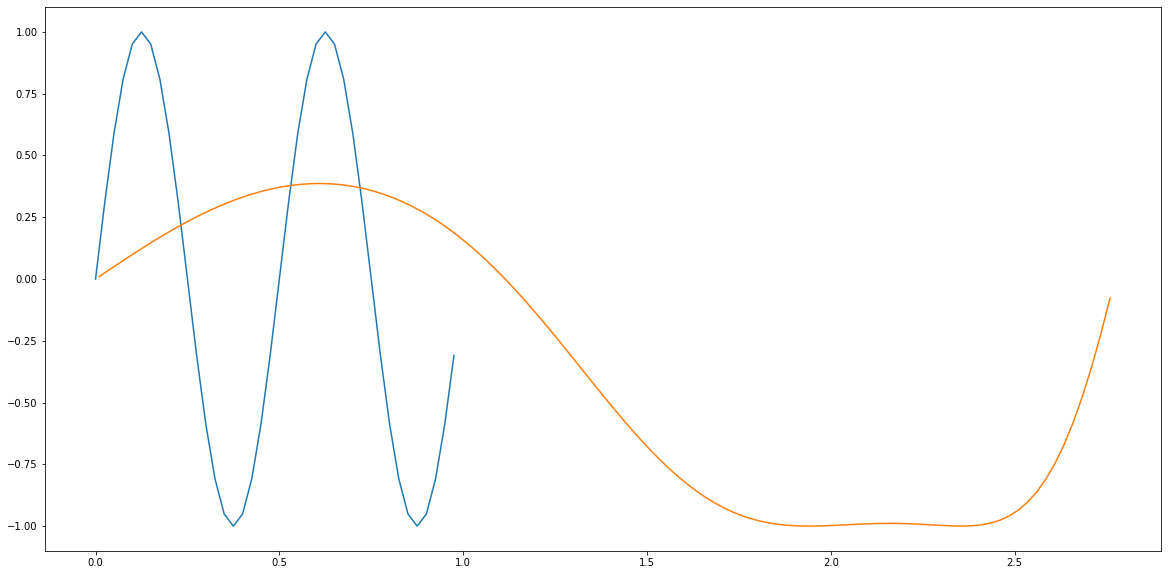

In [ ]:
t1 = np.arange(0, 1, 0.025)
t2 = np.arange(0.01, 2.77, 0.025)

figure = plt.figure(figsize = (20, 10))

plt.plot(t1, g1(t1))
plt.plot(t2, g2(t2))
plt.show()

In [ ]:
data = np.concatenate((np.tile(g1(t1), 3), g2(t2), np.tile(g1(t1), 1), g2(t2), np.tile(g1(t1), 3), g2(t2)), axis = 0, dtype = np.float32)
labels = np.concatenate((np.full((len(t1) * 3,), -1), np.ones((len(t2),)), np.full((len(t1),), -1), np.ones((len(t2),)),  np.full((len(t1) * 3,), -1), np.ones((len(t2),))), axis = 0, dtype = np.float32)


(613,)
(613,)


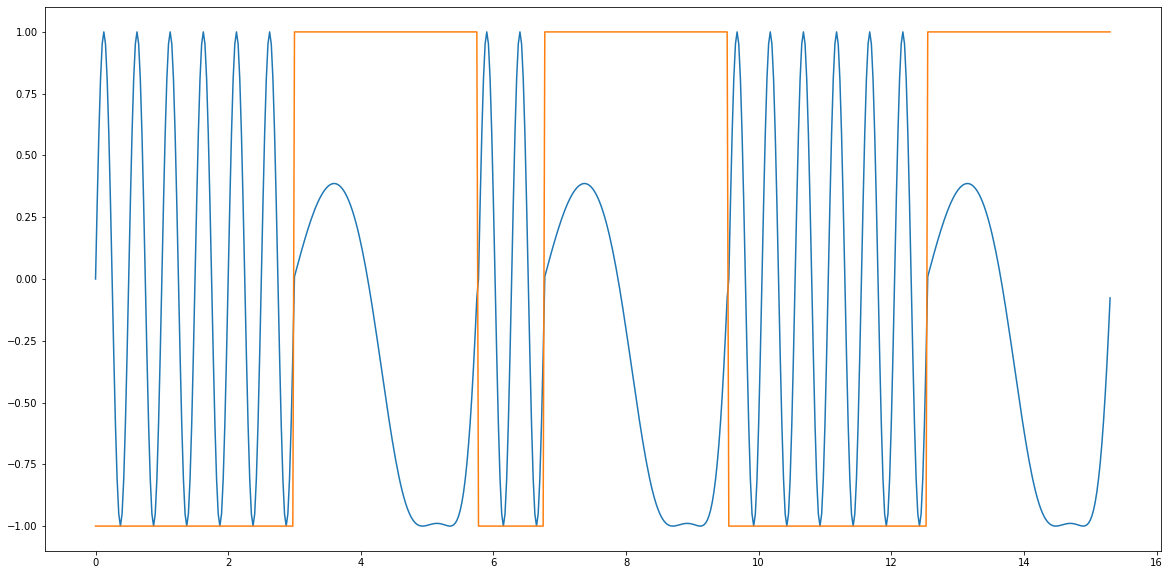

In [ ]:
print(data.shape)
print(labels.shape)
t3 = np.arange(0, 15.325, 0.025)

figure = plt.figure(figsize = (20, 10))

plt.plot(t3, data)
plt.plot(t3, labels)
plt.show()

In [ ]:
train = [(y, label) for y, label in zip(data, labels)]
traindl = DataLoader(train,  batch_size = 1, shuffle = False)

In [ ]:
elman = nn.Sequential(
    Elman(1, 16),
    nn.Linear(16, 1)
)

epochs = 150
optim = torch.optim.Adam(elman.parameters(), lr = 1e-3)
history = defaultdict(list)
elman.train()

for epoch in range(epochs):
    elman[0].clear_memory()
    losses = []
    correct = 0
    all = 0

    for y, label in traindl:
        out = elman(y)
        loss = nn.MSELoss()(out, label)
        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

        if out > 0:
            pred = 1
        else:
            pred = -1


        correct += (pred == label).sum().item()
        all += len(y)

    history['accuracy'].append(correct / all)
    history['loss'].append(np.mean(losses))

In [ ]:
d   

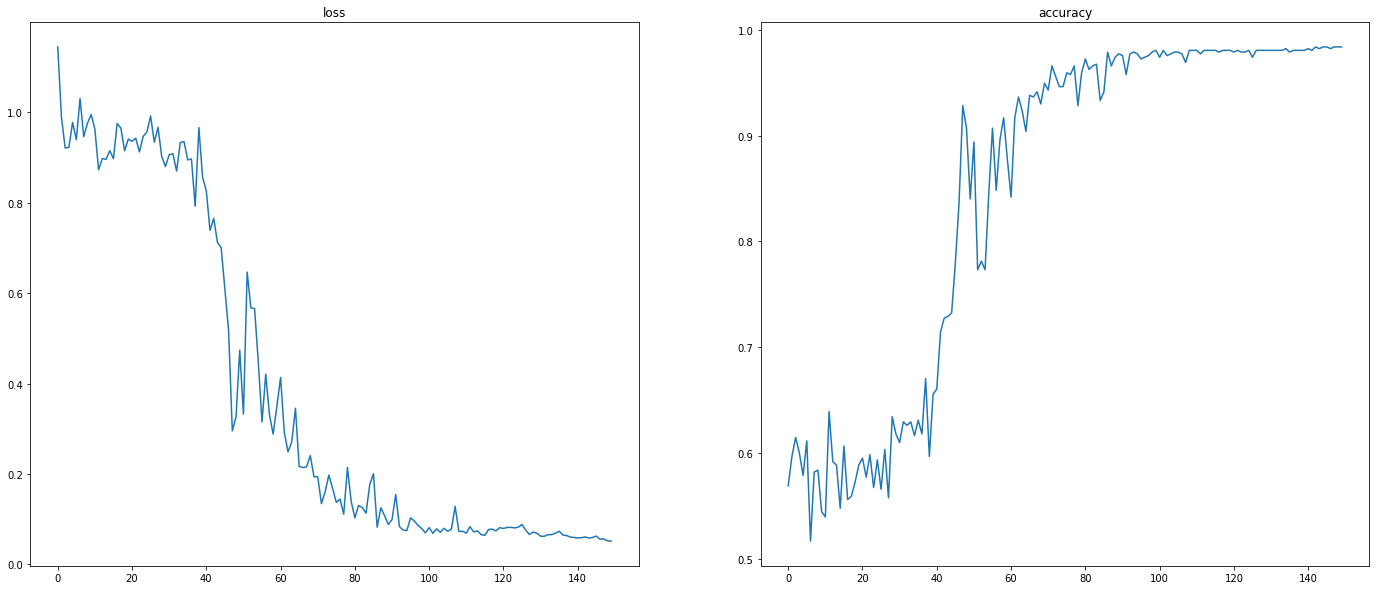

In [ ]:
    tt = np.arange(0, epochs, 1)

    figure = plt.figure(figsize = (24, 10))

    ax1 = figure.add_subplot(1, 2, 1)
    ax2 = figure.add_subplot(1, 2, 2)

    ax1.set_title('loss')
    ax1.plot(tt, history['loss'])

    ax2.set_title('accuracy')
    ax2.plot(tt, history['accuracy'])

    plt.show()

In [ ]:
elman.eval()
preds = []
for y, _ in traindl:
    ans = elman(y).detach().numpy()
    #print(ans)
    if ans[0] > 0:
        preds.append(1)
    else:
        preds.append(-1)

In [ ]:
print(preds)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1

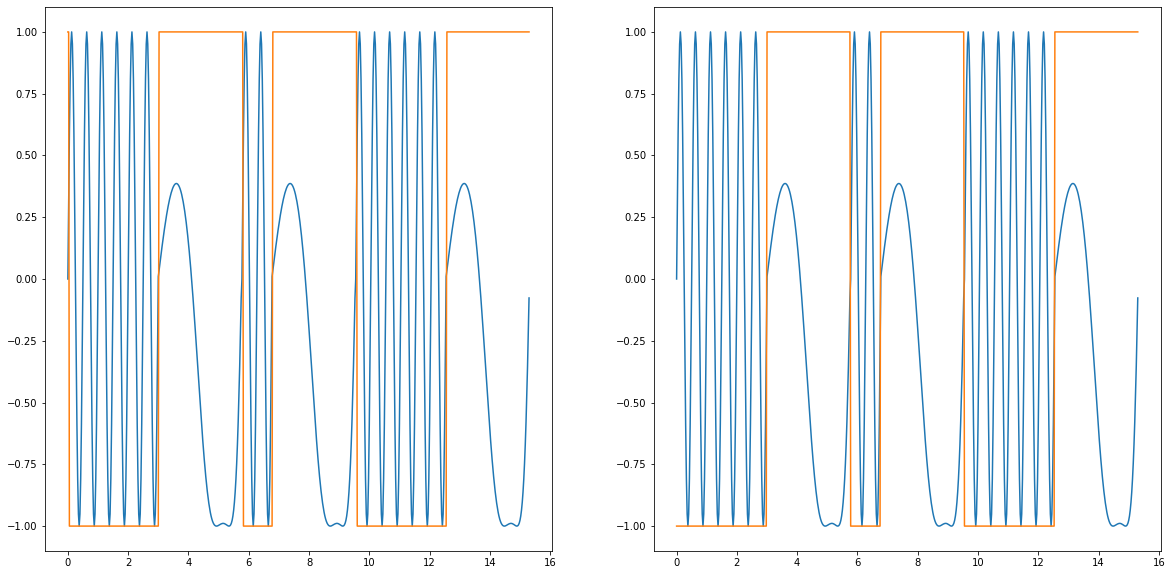

In [ ]:
figure = plt.figure(figsize = (20, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.plot(t3, data)
ax1.plot(t3, preds)

ax2.plot(t3, data)
ax2.plot(t3, labels)


plt.show()

# Сеть Хопфилда

In [ ]:
from PIL import Image

def load_image(path, width=320, height=240):
    image = Image.open(path)
    image = image.convert('RGB')  # удалить альфа канал, иногда он может присутствовать!
    image = image.resize((width, height), Image.ANTIALIAS)
    image = np.asarray(image, dtype=np.float32)
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)  # получить float32 вместо double
    image = (image - 127.5) / 127.5  # нормализовать [-1..1]
    return image.flatten()

In [ ]:
class Hopfield(nn.Module):
    def __init__(self, in_dim):
        super(Hopfield, self).__init__()
        self.w = nn.Parameter(torch.zeros(in_dim, in_dim))
        self.b = nn.Parameter(torch.zeros(in_dim))
        self.prev = torch.zeros(in_dim)
        
    def set_initial_value(self, value):
        self.prev = value.detach().clone()
        
    def forward(self, input = 0):
        out = torch.matmul(self.prev, self.w)
        out = torch.add(out, self.b)
        out = torch.clamp(out, min = -1, max = 1)
        self.prev = out.detach().clone()
        return out

In [ ]:
def load_images():
    return [
        load_image('/content/0.png', 10, 12),
        load_image('/content/3.png', 10, 12),
        load_image('/content/9.png', 10, 12),
    ]

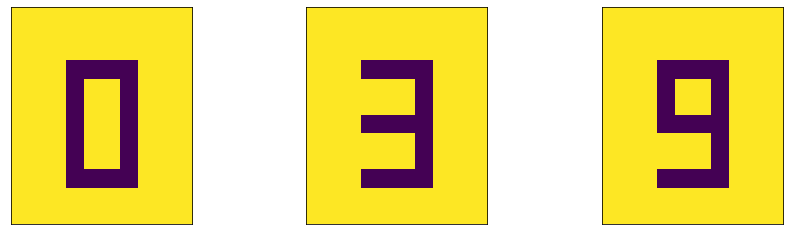

In [ ]:
images = load_images()
traindl = DataLoader(images, batch_size = 1, shuffle = True)

fig = plt.figure(figsize = (len(images) * 5, 4))
for i, img in enumerate(images):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img.reshape(12, 10))
plt.show()

In [ ]:
hopfield = Hopfield(120)

epochs = 500
optim = torch.optim.Adam(hopfield.parameters(), lr = 1e-4)
history = defaultdict(list)
hopfield.train()

for epoch in range(epochs):
    for img in traindl:
        losses = []
        hopfield.set_initial_value(img)
        out = hopfield()
        loss = nn.MSELoss()(out, img)

        optim.zero_grad()
        loss.backward()
        optim.step()

        losses.append(loss.item())

        history['loss'].append(np.mean(losses))

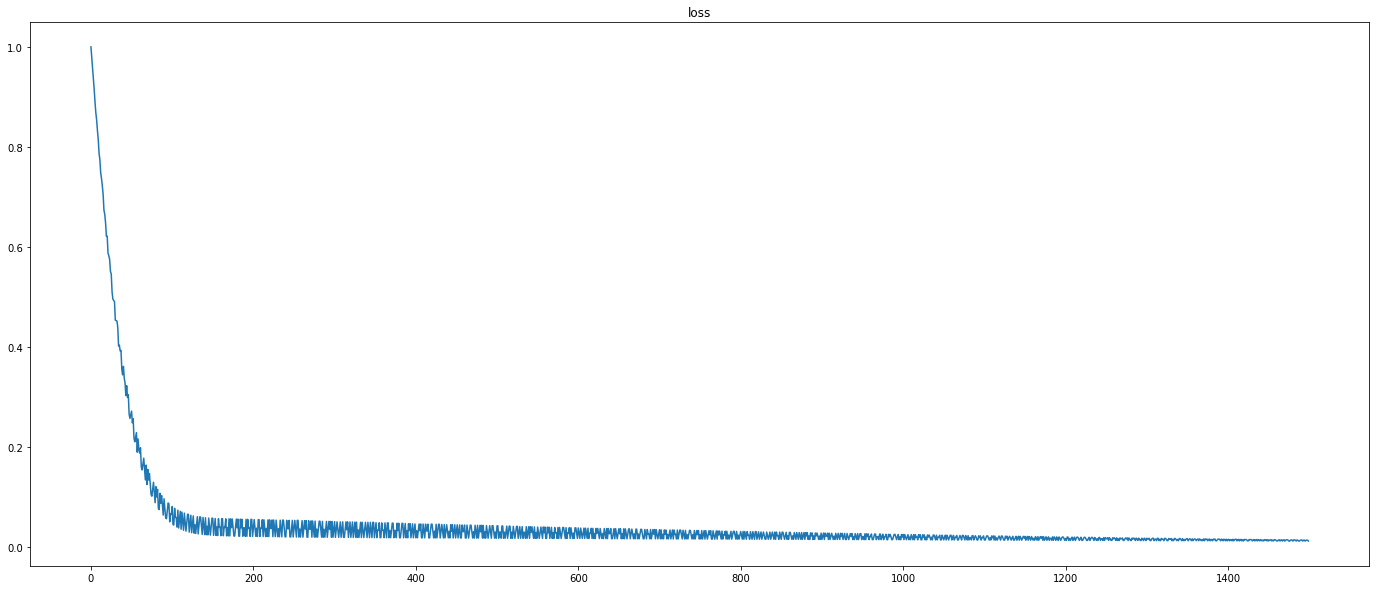

In [ ]:
    tt = np.arange(0, epochs * 3, 1)

    figure = plt.figure(figsize = (24, 10))

    plt.title('loss')
    plt.plot(tt, history['loss'])

    plt.show()

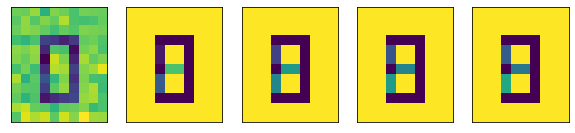

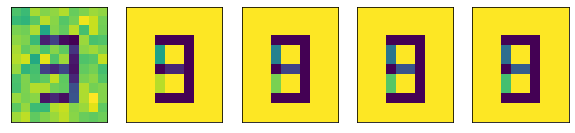

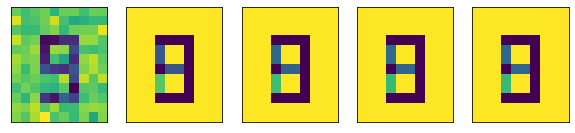

In [ ]:
for img in images:
    out = torch.clamp(torch.tensor(img) + torch.randn(img.shape) / 4, -2, 2) / 2

    hopfield.eval()
    hopfield.set_initial_value(out)
    steps = 5
    fig = plt.figure(figsize=(steps * 2, 4))
    for i in range(steps):
        ax = fig.add_subplot(1, steps, i+1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(out.detach().numpy().reshape(12, 10))
        out = hopfield()
    plt.show()



# Выводы

Выполнив данную лабораторную работу, я изучил строение сетей Элмана и Хопфилда, реализовал их, а также применил для распознования статических и динамических образов.